# Abalone Case Study:

Problem Statement:\
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

 Sex / nominal / -- / M, F, and I (infant)\
 Length / continuous / mm / Longest shell measurement\
 Diameter / continuous / mm / perpendicular to length\
 Height / continuous / mm / with meat in shell\
 Whole weight / continuous / grams / whole abalone\
 Shucked weight / continuous / grams / weight of meat\
 Viscera weight / continuous / grams / gut weight (after bleeding)\
 Shell weight / continuous / grams / after being dried

 The number of rings is the value to predict. 
 age of abalone: rings +1.5 gives the age in years.

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset:

In [2]:
df = pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.shape

(4177, 9)

In [4]:
df.columns.tolist()

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Checking Missing Values:

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Null values using Heatmap:

<AxesSubplot:>

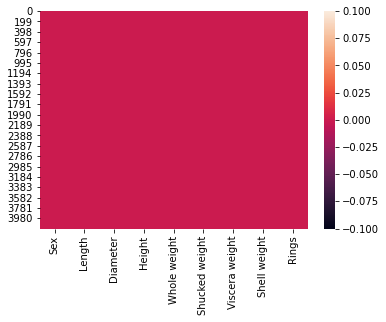

In [7]:
sns.heatmap(df.isnull())

# Check for Categorical data:

In [8]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Column Sex has dtype object and needs to be encoded for further preprocesing.

In [9]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['Sex'] = lbl.fit_transform(df['Sex'])

In [10]:
df['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [11]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Visualization of Dataset:

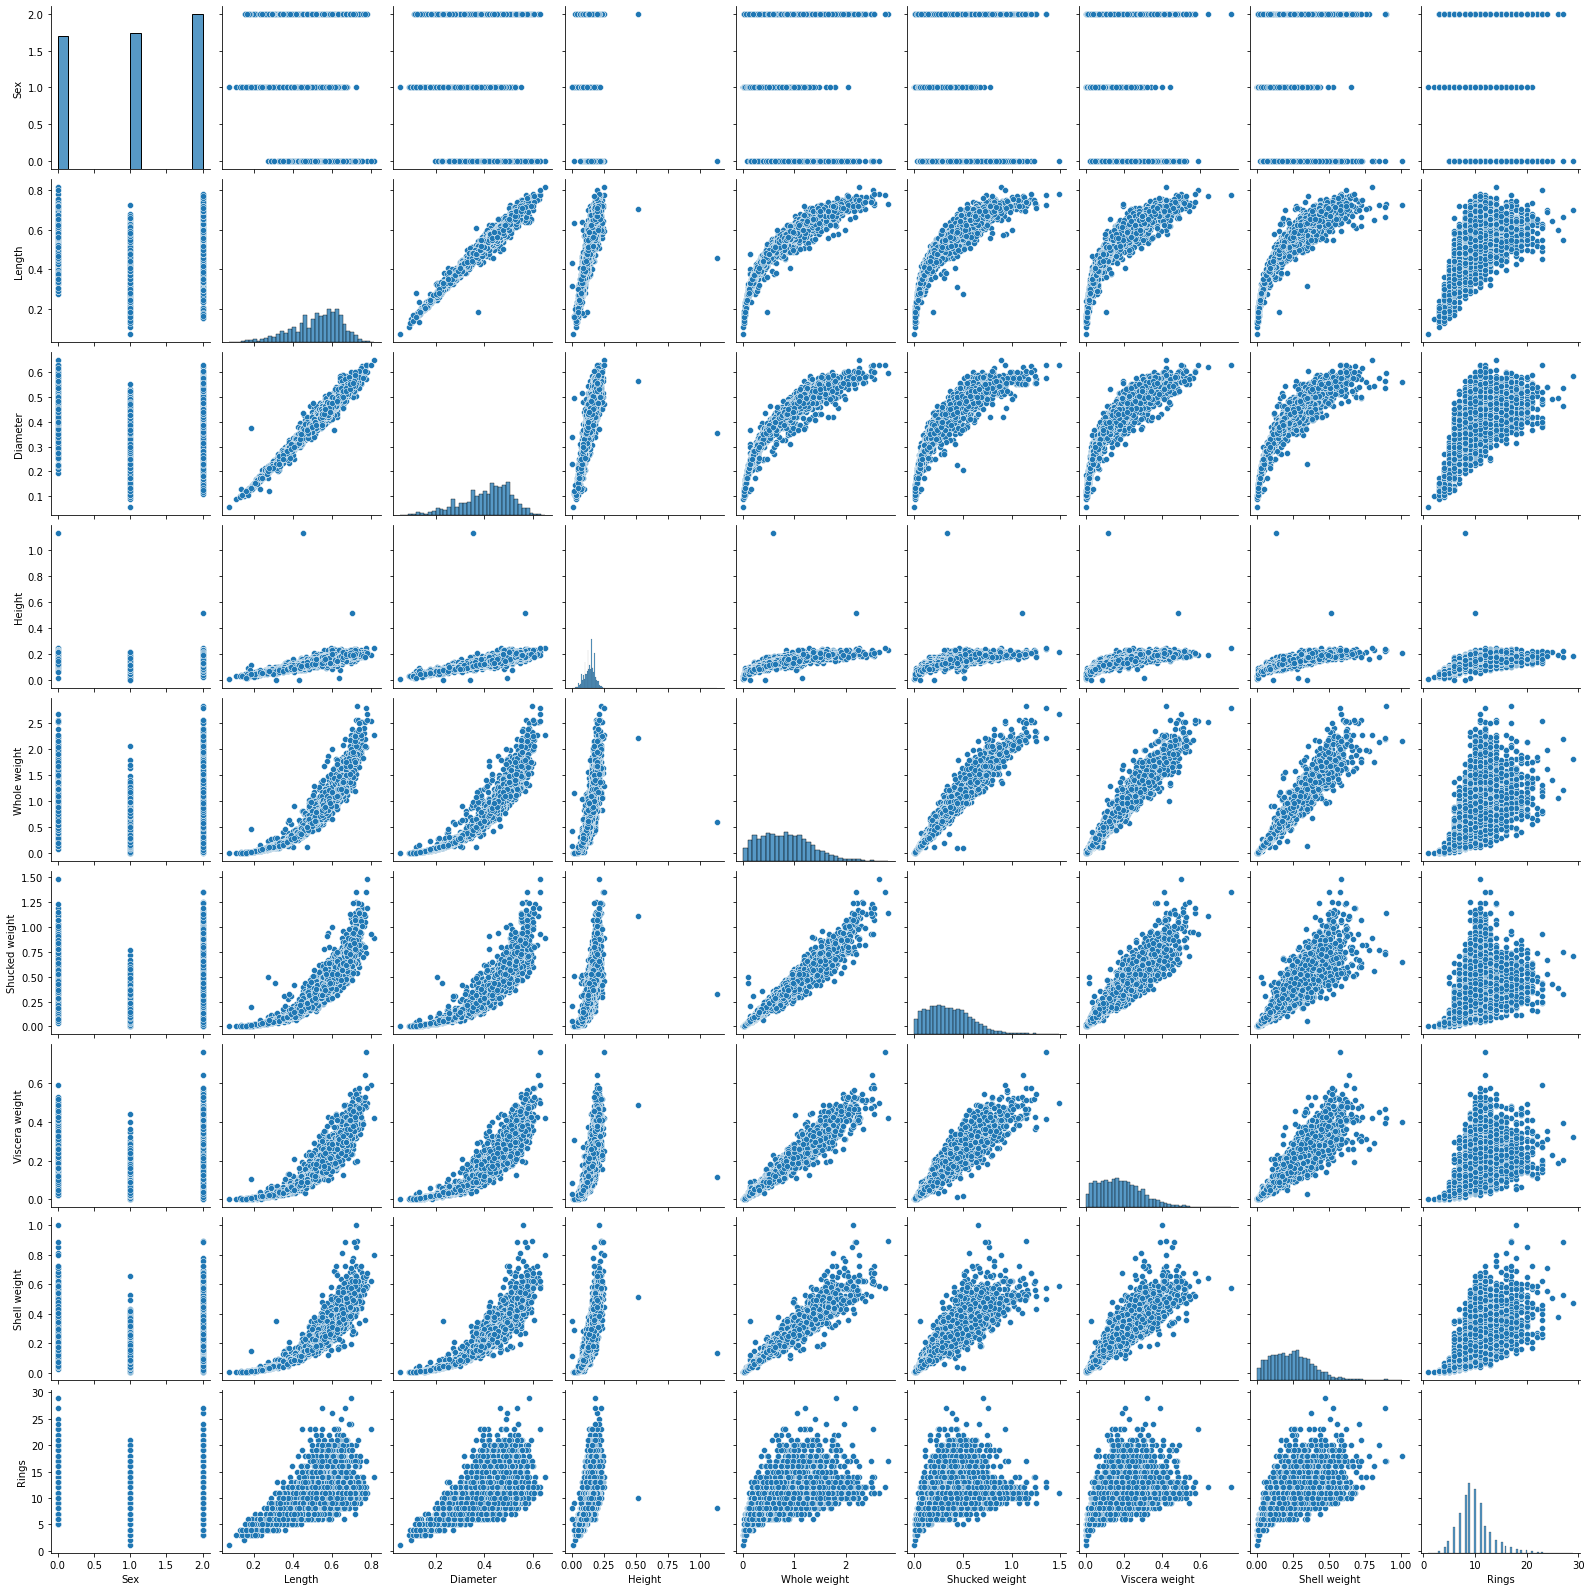

In [12]:
sns.pairplot(df)


In this multivariate analysis, we can see the correlation among all the columns in the dataset.

<AxesSubplot:xlabel='Sex', ylabel='count'>

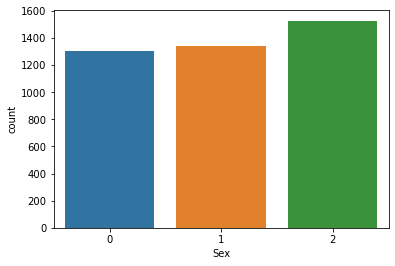

In [13]:
'''Sex Count of Abalone, M - Male, F - Female, I - Infant'''
sns.countplot(x='Sex', data = df)

In [14]:
print(df['Sex'].value_counts())

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


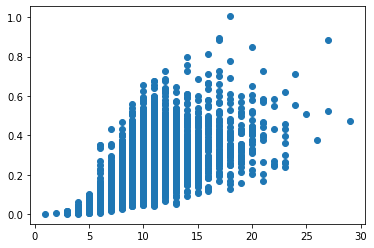

In [15]:
plt.scatter(df['Rings'],df['Shell weight'])
plt.show()

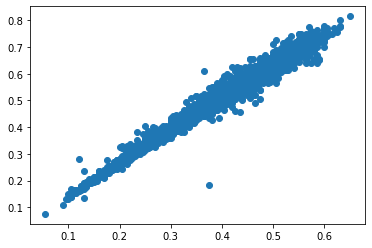

In [16]:
plt.scatter(df['Diameter'],df['Length'])
plt.show()

A highly Positive Corelation

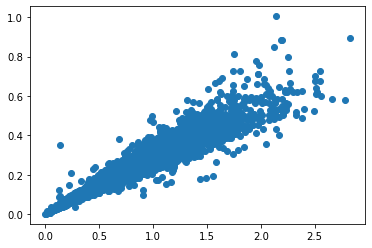

In [17]:
plt.scatter(data = df, x='Whole weight', y='Shell weight')

The columns Whole weight and Shell weigh have Positive corelation

# Correlation

In [18]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# Correlation using Heatmap:

<AxesSubplot:>

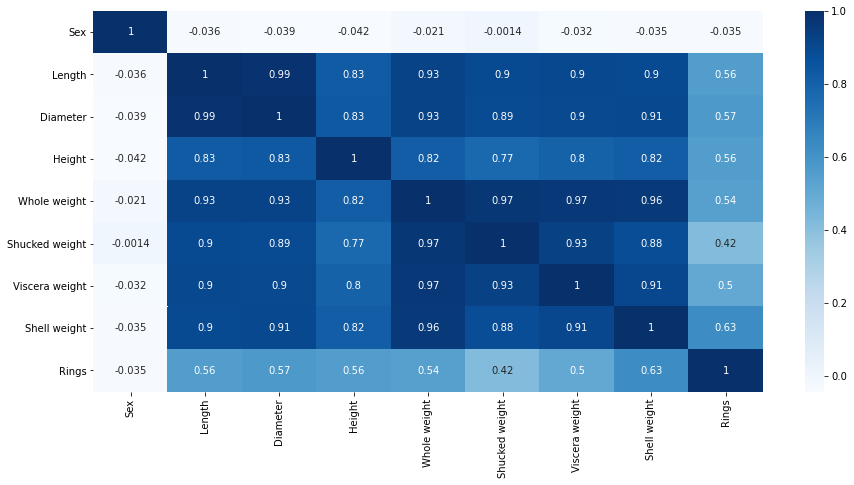

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, cmap ='Blues')

Checking the columns which are positively and negative correlated with target columns:

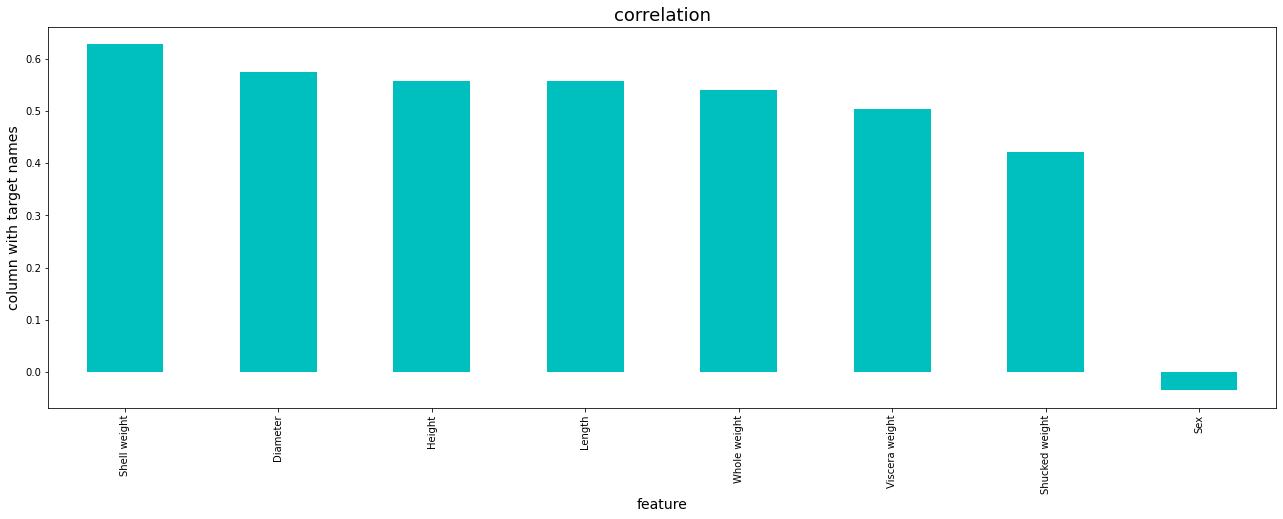

In [20]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

It is observed that all columns have Positive corelation except 'Sex' column.

# Outcome of Correlation

As we can observe from the above heatmap of correlations, 
Shell weight has the strongest correlation.
Column sex and shucked weight has less corelation. So it can be dropped. (for good correlation>= 0.5 and good correlation<=-0.5)

In [21]:
df=df.drop(['Sex','Shucked weight'],axis=1)
df

,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.2610,0.2960,10


# Describe Heatmap

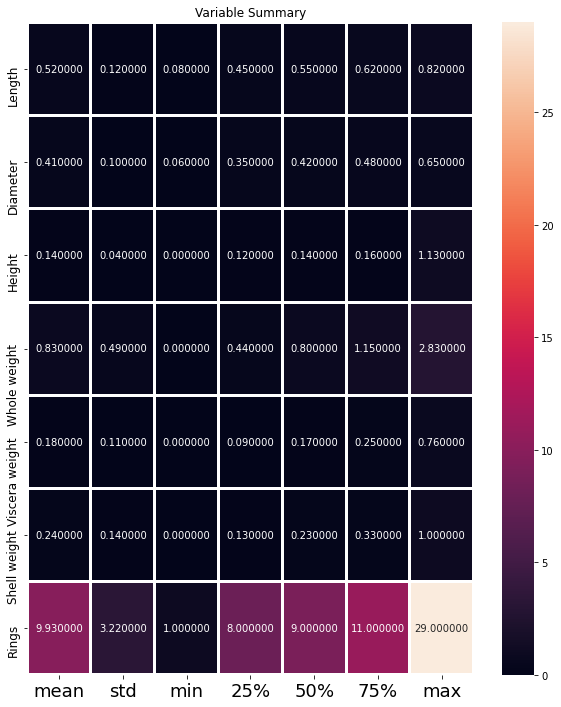

In [22]:
plt.figure(figsize=(10,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2, annot = True, fmt = 'f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

All Features are not Normally Distributed, ( Theortically if feature is normally distributed, Mean = Median = Mode ).\
High gap between 75th percentile and max is present in rings. So, few outliers are present.

# Description of Datasets

In [23]:
df.describe()

,Length,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,0.760000,1.005000,29.000000


# Heatmap And Describe Finding...

From the above plotting we are determining mean, standard deviation, minimum and maximum value of each column. It helps us further in data cleaning.

Total Number of rows in the datasets:

4177 rows\
7 columns

Length:
Mean=0.523992\
std=0.120093\
max_value=0.815000\
min_value=0.075000

Diameter:

Mean=0.407881\
std=0.099240\
max_value=0.650000\
min_value=0.055000

Height:\
Mean=0.139516\
std=0.041827\
max_value=1.130000\
min_value=0.000000

Whole weight:\
Mean=0.828742\
std=0.490389\
max_value=2.825500\
min_value=0.002000

Viscera weight:\
Mean=0.180594\
std=0.109614\
max_value=0.760000\
min_value=0.000500

Shell weight:\
Mean=0.238831\
std=0.139203\
max_value=1.005000\
min_value=0.001500
    
Rings: \
Mean=9.933684\
std=3.224169\
max_value=29.000000\
min_value=1.000000

# Checking for Outliers

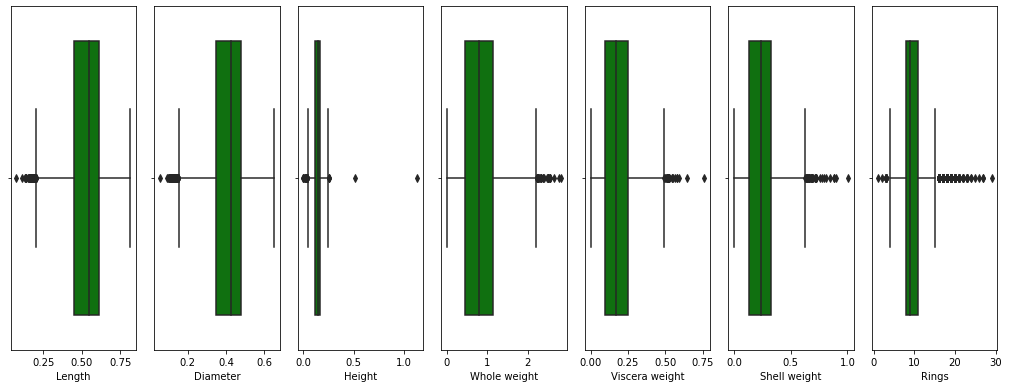

In [24]:
col_list = df.columns.values
ncol = 15
nrows = 15
plt.figure(figsize=(30,80))
for i in range(0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[col_list[i]],color = 'green', orient='h')
    plt.tight_layout()

Outcome: All columns found to have outliers.

# Removing Outliers using Zscore:

In [25]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
z.shape

(4177, 7)

In [26]:
threshold = 3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  236,  237,  237,  238,
        238,  239,  270,  275,  277,  278,  294,  310,  313,  314,  334,
        351,  355,  358,  358,  362,  375,  416,  417,  428,  431,  433,
        469,  478,  480,  501,  526,  526,  530,  572,  628,  673,  674,
        675,  678,  694,  696,  696,  719,  719,  720,  720,  744,  754,
        756,  811,  891,  891, 1048, 1051, 1052, 1204, 1206, 1207, 1207,
       1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428, 1429, 1429, 1757,
       1759, 1762, 1762, 1763, 1763, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2623, 2624, 2624, 2709, 2710, 2810, 2811, 2811,
       2863, 2863, 3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193,
       3280, 3359, 3427, 3427, 3599, 3628, 3715, 3

In [27]:
df_new = df[(z<3).all(axis=1)] 
print(df.shape)
print(df_new.shape)

(4177, 7)
(4046, 7)


# Percentage Data Loss

In [28]:
loss_percent =(4177-4046)/4177*100
print(loss_percent)

3.136222169020828


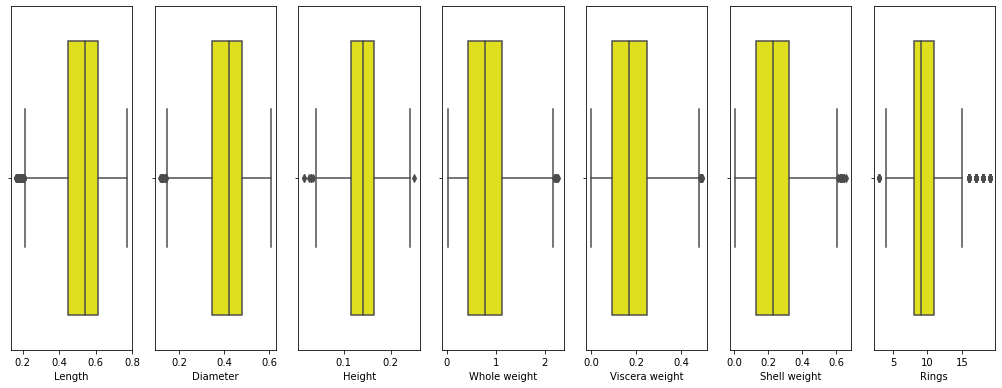

In [29]:
col_list = df_new.columns.values
ncol = 15
nrows = 15
plt.figure(figsize=(30,80))
for i in range(0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[col_list[i]],color = 'yellow', orient='h')
    plt.tight_layout()

Removing Outliers using IQR as Outliers are still present in the data.

In [30]:
from scipy import stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df1 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df1.shape

(3801, 7)

In [31]:
loss_percent =(4177-3801)/4177*100
print(loss_percent)

9.00167584390711


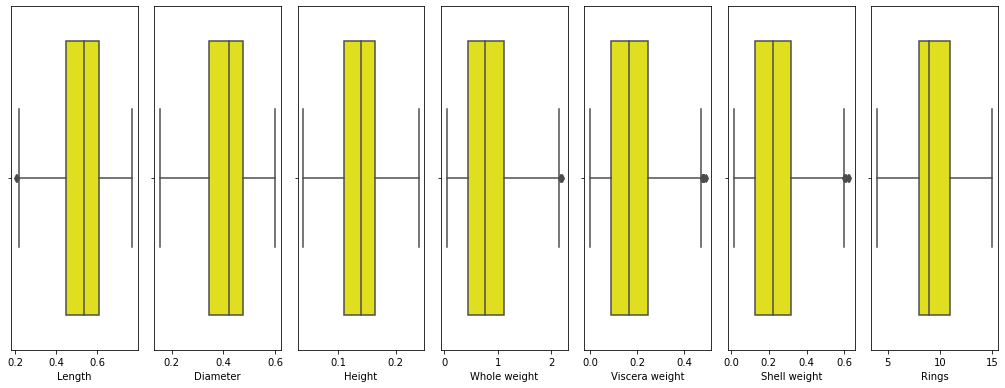

In [32]:
col_list = df1.columns.values
ncol = 15
nrows = 15
plt.figure(figsize=(30,80))
for i in range(0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[col_list[i]],color = 'yellow', orient='h')
    plt.tight_layout()

As, the data loss is less than 10%, remove some more outliers

In [33]:
z_scr=zscore(df1)
print(df1.shape)
df_new=df1.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(3801, 7)
(3789, 7)


In [34]:
((4177-3789)/4177)*100

9.288963370840316

In [35]:
Q1 = df_new.quantile(q=.25)
Q3 = df_new.quantile(q=.75)
IQR = df_new.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df1 = df_new[~((df_new < (Q1-1.5*IQR)) | (df_new > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df1.shape

(3781, 7)

In [36]:
((4177-3781)/4177)*100

9.480488388795786

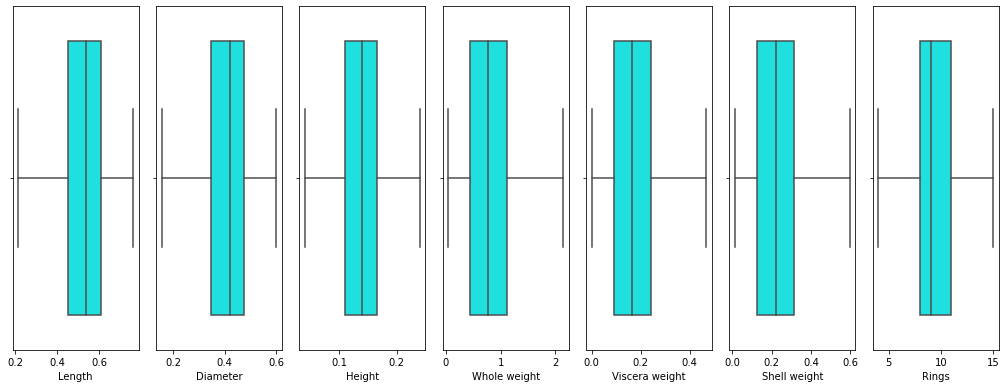

In [37]:
col_list = df1.columns.values
ncol = 15
nrows = 15
plt.figure(figsize=(30,80))
for i in range(0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[col_list[i]],color = 'cyan', orient='h')
    plt.tight_layout()

### Now the dataset has no outliers.

# Normal Distribution Curve:

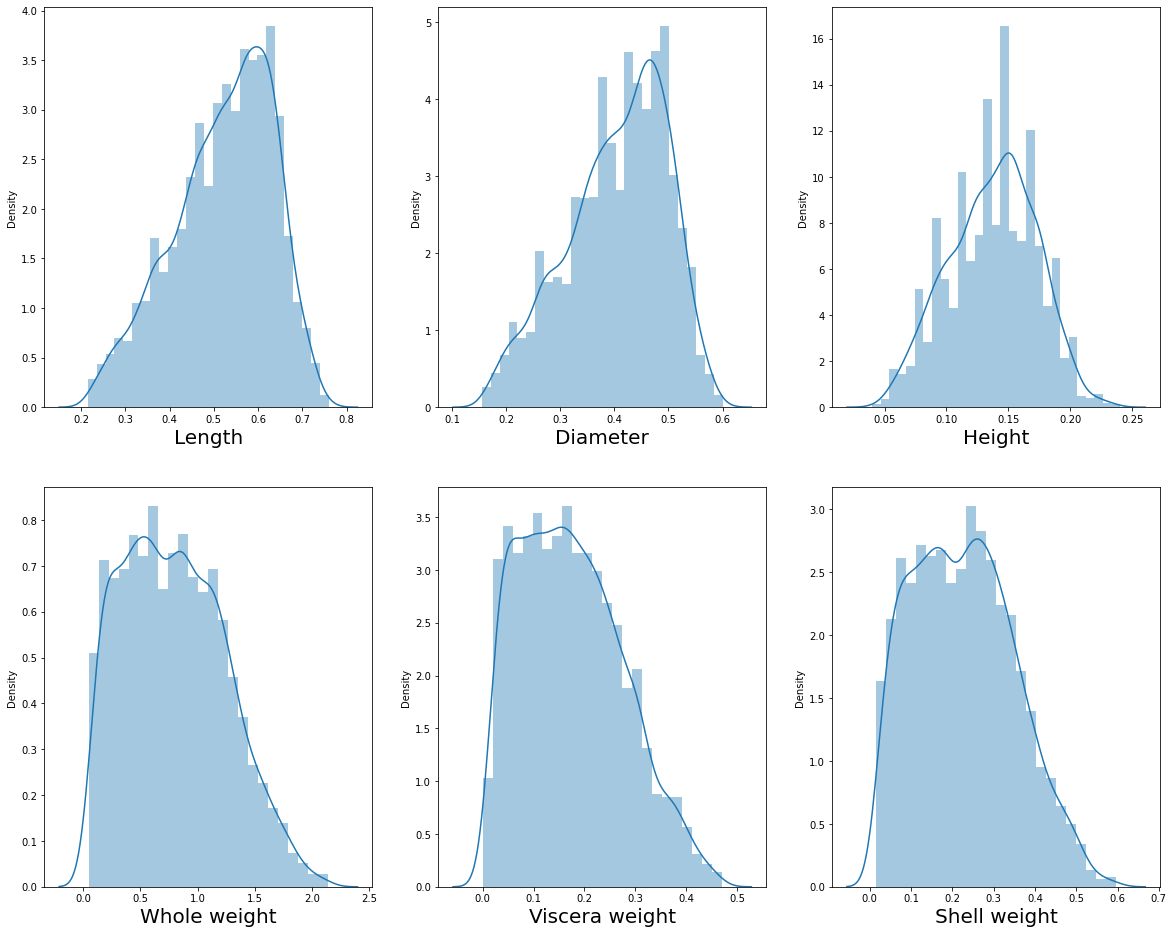

In [38]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df1.columns:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='Rings', ylabel='Length'>

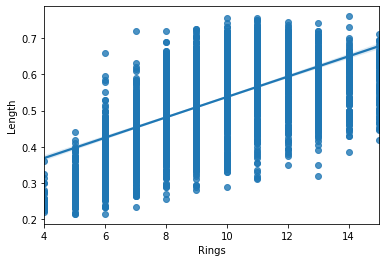

In [39]:
sns.regplot(data=df1, x='Rings', y='Length')

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

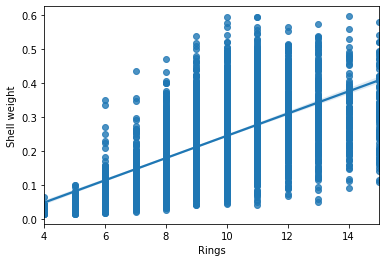

In [40]:
sns.regplot(data = df1, x='Rings', y='Shell weight')

<AxesSubplot:xlabel='Rings', ylabel='Height'>

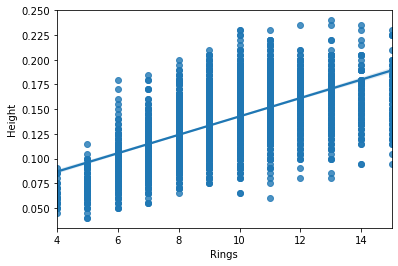

In [41]:
sns.regplot(data = df1, x='Rings', y='Height')

Observing the above plots, we can state that, with the increase in feature, there is increase in ring size of abalone.
Hence its a regression problem.

# Separating out features and labels:

In [42]:
x = df1.drop(columns=['Rings'])
y = df1[['Rings']].values

In [43]:
x.shape

(3781, 6)

# Checking for Skewness:

In [44]:
print(x.skew())

Length           -0.487048
Diameter         -0.479041
Height           -0.150128
Whole weight      0.368068
Viscera weight    0.439815
Shell weight      0.319787
dtype: float64


In [45]:
print(len(x.skew().loc[x.skew()>0.55])) # Number of features having skewness more than 0.55 

0


It means that the feature data is not so biased.

# Feature Scaling:

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-0.59541818, -0.43609615, -1.20287663, -0.6263238 , -0.72188877,
        -0.62223238],
       [-1.53788173, -1.52145655, -1.34474688, -1.27215177, -1.24124163,
        -1.27625336],
       [ 0.07777007,  0.16085208, -0.06791461, -0.26143659, -0.32124513,
        -0.13171664],
       ...,
       [ 0.7060791 ,  0.7578003 ,  1.91826891,  0.85561075,  1.12305044,
         0.66945906],
       [ 0.93047518,  0.86633634,  0.35769614,  0.67316714,  0.8609009 ,
         0.57135591],
       [ 1.69342186,  1.62608863,  1.63452841,  2.58490748,  2.0034772 ,
         2.1982331 ]])

# Checking for Multi-Colinearity

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,39.253653,Length
1,40.032141,Diameter
2,6.453310,Height
3,33.268095,Whole weight
4,15.864635,Viscera weight
5,16.290301,Shell weight


Removing highest collinearity which is diameter  & whole weight 

In [48]:
x = df1.drop(columns = ['Diameter','Rings','Whole weight'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,9.162710,Length
1,6.313877,Height
2,8.310698,Viscera weight
3,10.507904,Shell weight


In [49]:
X_scaled

array([[-0.59541818, -1.20287663, -0.72188877, -0.62223238],
       [-1.53788173, -1.34474688, -1.24124163, -1.27625336],
       [ 0.07777007, -0.06791461, -0.32124513, -0.13171664],
       ...,
       [ 0.7060791 ,  1.91826891,  1.12305044,  0.66945906],
       [ 0.93047518,  0.35769614,  0.8609009 ,  0.57135591],
       [ 1.69342186,  1.63452841,  2.0034772 ,  2.1982331 ]])

# Regressor Model Building:

# Performing Regression:

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr_model = LinearRegression()

In [51]:

maxscr=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(X_scaled,y, test_size=.25,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= r2_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.46347188193822053 on random state 77


In [52]:
# Creating train test split

x_train,x_test,y_train,y_test= train_test_split(X_scaled,y, test_size=.25,random_state=77)

# Model creation

In [53]:
lr= LinearRegression()
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)
print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))

Score:  0.3977881455409865
r2 score:  0.46347188193822053


In [54]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))

Score:  0.9998358242871647
r2 score:  0.014248620142293777


In [55]:
from sklearn.ensemble import RandomForestRegressor
fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)
print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))

Score:  0.918964606652787
r2 score:  0.47893353116730697


In [56]:

from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))

Score:  0.46331249570986366
r2 score:  0.4916787860713193


In [57]:
# Regularization

from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
predls= ls.predict(x_test)
print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))

Score:  0.18664636714286909
r2 score:  0.20360923451521318


# Checking CV score

In [58]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,X_scaled,y,cv=5)
print('cross validation score for linear reg model: ', scr.mean())

cross validation score for linear reg model:  0.3318983162696336


In [59]:
scr= cross_val_score(dt,X_scaled,y,cv=5)
print('cross validation score for Decision tree reg model: ', scr.mean())

cross validation score for Decision tree reg model:  -0.17725864300176974


In [60]:
scr= cross_val_score(fr,X_scaled,y,cv=5)
print('cross validation score for Random forest reg model: ', scr.mean())

cross validation score for Random forest reg model:  0.3592758533504541


In [61]:
scr= cross_val_score(svr,X_scaled,y,cv=5)
print('cross validation score for support vector reg model: ', scr.mean())

cross validation score for support vector reg model:  0.41450984144973246


In [62]:
scr= cross_val_score(ls,X_scaled,y,cv=5)
print('cross validation score for support vector reg model: ', scr.mean())

cross validation score for support vector reg model:  0.12780783890639638


We can see decision tree is performing very bad. All other models are performing nearly same, so lets perform hyper parameter tuning on them.

# Hyper parameter tuning

In [63]:

from sklearn.model_selection import GridSearchCV

parfr={'criterion' : ["mse", "mae"], 'max_features':['auto','sqrt','log2']}
gcvfr= GridSearchCV(fr,parfr,cv=5) 
gcvfr.fit(x_train,y_train)
gcvfr.best_params_

{'criterion': 'mae', 'max_features': 'log2'}

In [64]:
parsvr={'kernel' : ["linear", "poly",'rbf'], 'gamma':['auto','scale']}
gcvsvr= GridSearchCV(svr,parsvr,cv=5) 
gcvsvr.fit(x_train,y_train)
gcvsvr.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [65]:
parls={'alpha' : [0.0001,0.001,0.01,0.1,1]}
gcvls= GridSearchCV(ls,parls,cv=5) 
gcvls.fit(x_train,y_train)
gcvls.best_params_

{'alpha': 0.001}

# Now using the above parameters which are found to be best, lets create the best model

In [66]:
mod1= RandomForestRegressor(criterion='mae', max_features='log2', random_state=77)
mod1.fit(x_train,y_train)
pred1=mod1.predict(x_test)
print('Score: ',mod1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred1))

Score:  0.9042212288056972
r2 score:  0.4926698825639607


In [67]:
mod2= Lasso(alpha=0.001,random_state=77)
mod2.fit(x_train,y_train)
pred2=mod2.predict(x_test)
print('Score: ',mod2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred2))

Score:  0.3977824526981324
r2 score:  0.4633340187389454


In [68]:
mod3= SVR(kernel='rbf', gamma='scale')
mod3.fit(x_train,y_train)
pred3=mod3.predict(x_test)
print('Score: ',mod3.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred3))

Score:  0.46331249570986366
r2 score:  0.4916787860713193


 Random forest is performing better.So making it as final model.

In [69]:
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,pred1))
print('Mean squared error:', mean_squared_error(y_test,pred1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred1)))

Mean absolute error: 1.2872515856236788
Mean squared error: 2.7888932875264274
Root mean squared error: 1.6699979902761641


# Saving the best model

In [73]:
import joblib

joblib.dump(mod1,'Abalone.obj')

['Abalone.obj']

In [74]:
loadmodel = joblib.load('Abalone.obj')

# Conclusion:

In [86]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,[10],11.07
1,[14],10.59
2,[11],11.35
3,[11],10.32
4,[8],8.37
...,...,...
941,[10],7.07
942,[13],10.31
943,[10],9.99
944,[9],8.50
